# 0. Imports + Load data

In [2]:
# Блок 0: базовые импорты и подключение диска

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pathlib import Path

# Подключаем Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Путь к папке с данными на диске
DATA_DIR = Path("/content/drive/MyDrive/AlfaBand_HACK")

In [4]:
# Блок 1: загрузка данных

train_path = DATA_DIR / "hackathon_income_train.csv"
test_path = DATA_DIR / "hackathon_income_test.csv"
feat_desc_path = DATA_DIR / "features_description.csv"

train = pd.read_csv(
    train_path,
    sep=";",
    engine="python",
    on_bad_lines="warn",
    na_values=["None", "nan"]
)

test = pd.read_csv(
    test_path,
    sep=";",
    engine="python",
    on_bad_lines="warn",
    na_values=["None", "nan"]
)

feat_desc = pd.read_csv(
    feat_desc_path,
    sep=";",
    engine="python",
    encoding="windows-1251"
)


print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Features description shape:", feat_desc.shape)



Train shape: (76786, 224)
Test shape: (73214, 222)
Features description shape: (224, 2)


# 1. Разбор данных и признаков (типы, target, w, num/cat features)

In [5]:
# Блок 2: общая структура данных

print("Первые строки train:")
display(train.head())

print("\nИнформация о train:")
print(train.info())

print("\nПервые строки test:")
display(test.head())

print("\nПервые строки features_description:")
display(feat_desc.head())
print("\nКолонки в features_description:", feat_desc.columns.tolist())


Первые строки train:


,id,dt,target,turn_cur_cr_avg_act_v2,salary_6to12m_avg,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,...,dp_ils_uniq_companies_1y,avg_6m_travel,avg_6m_government_services,hdb_bki_active_cc_max_overdue,total_rur_amt_cm_avg_period_days_ago_v2,label_Above_1M_share_r1,transaction_category_supermarket_sum_cnt_d15,max_balance_rur_amt_1m_af,w,first_salary_income
0,2,2024-04-30,"109324,47632478633","1465144,96",NaN,52800.0,"365346,244633755",23213.0,"97366,0",Женский,...,"1,0","0,0","57,0",0.0,"297,0","0,02702702702702703","9,0",NaN,"0,3012172807640372",NaN
1,4,2024-02-29,"25558,02866242038","303593,66",NaN,260200.0,NaN,10000.0,"32580,0",Женский,...,NaN,"0,0","707,0",67.0,"30245,0",NaN,"2,0",NaN,"0,6957996079578388",NaN
2,5,2024-02-29,"40666,753097982706","490754,01",NaN,2000000.0,NaN,90000.0,"96866,0",Женский,...,NaN,"422,0","0,0",0.0,"210322,0","0,0","20,0",NaN,"0,5159704060557002",NaN
3,6,2024-04-30,"43856,67205839414","219875,12",NaN,75000.0,NaN,75000.0,"43860,0",Мужской,...,NaN,"0,0","0,0",0.0,"7187,0","0,0","7,0",NaN,"0,4780029003784456",NaN
4,7,2024-04-30,"130420,85199232883","1750241,8449999997",NaN,1000000.0,NaN,240000.0,"83815,0",Женский,...,NaN,"0,0","84,0",0.0,"690038,0","0,0","9,0",NaN,"0,5523135540134384",NaN



Информация о train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76786 entries, 0 to 76785
Columns: 224 entries, id to first_salary_income
dtypes: float64(34), int64(1), object(189)
memory usage: 131.2+ MB
None

Первые строки test:


,id,dt,turn_cur_cr_avg_act_v2,salary_6to12m_avg,hdb_bki_total_max_limit,dp_ils_paymentssum_avg_12m,hdb_bki_total_cc_max_limit,incomeValue,gender,avg_cur_cr_turn,...,total_sum,dp_ils_uniq_companies_1y,avg_6m_travel,avg_6m_government_services,hdb_bki_active_cc_max_overdue,total_rur_amt_cm_avg_period_days_ago_v2,label_Above_1M_share_r1,transaction_category_supermarket_sum_cnt_d15,max_balance_rur_amt_1m_af,first_salary_income
0,0,2024-08-31,"805319,38",NaN,61137.47,NaN,60000.0,"159999,0",Женский,"69740,0",...,NaN,NaN,"0,0","0,0",NaN,"80228,0","0,0","1,0",NaN,NaN
1,1,2024-10-31,"306240,0",NaN,949500.00,NaN,230000.0,"108834,0",Мужской,"63513,0",...,"0,0",NaN,"0,0","0,0",0.0,"24888,0","0,0",NaN,NaN,NaN
2,3,2024-09-30,"164908,72999999998",NaN,178000.00,NaN,178000.0,"59203,0",Женский,"132,0",...,"38630,630000000005",NaN,"0,0","0,0",2363.9,"223,0",NaN,NaN,NaN,NaN
3,9,2024-10-31,"2374846,42",NaN,25500.00,"126247,44835851202",4999.0,"180906,0",Женский,"290339,0",...,NaN,"3,0","800,0","0,0",NaN,"25734,0","0,0","7,0","0,0",NaN
4,11,2024-11-30,"735902,71","47828,145620567375",60000.00,NaN,60000.0,"24922,0",Мужской,"76924,0",...,"0,0",NaN,"0,0","0,0",0.0,"1214,0","0,0","15,0",NaN,NaN



Первые строки features_description:


,признак,описание
0,dt,Дата актуальности признаков
1,target,таргет
2,turn_cur_cr_avg_act_v2,Средний текущий кредитовый оборот по текущим с...
3,salary_6to12m_avg,Усреднённая ЗП клиента за окно в минимум 6 мес...
4,hdb_bki_total_max_limit,БКИ: Максимальный кредитный лимит по любому пр...



Колонки в features_description: ['признак', 'описание']


In [6]:
# Блок 3: сравнение признаков train и test

train_cols = set(train.columns)
test_cols = set(test.columns)

only_in_train = train_cols - test_cols
only_in_test = test_cols - train_cols

print("Только в train:", only_in_train)
print("Только в test:", only_in_test)


Только в train: {'w', 'target'}
Только в test: set()


In [7]:
# Блок 4: просмотр списка колонок

print("Колонки train:")
for i, col in enumerate(train.columns):
    print(i, col, "->", train[col].dtype)


Колонки train:
0 id -> int64
1 dt -> object
2 target -> object
3 turn_cur_cr_avg_act_v2 -> object
4 salary_6to12m_avg -> object
5 hdb_bki_total_max_limit -> float64
6 dp_ils_paymentssum_avg_12m -> object
7 hdb_bki_total_cc_max_limit -> float64
8 incomeValue -> object
9 gender -> object
10 avg_cur_cr_turn -> object
11 adminarea -> object
12 turn_cur_cr_avg_v2 -> object
13 turn_cur_cr_max_v2 -> object
14 hdb_bki_total_pil_max_limit -> float64
15 age -> object
16 dp_ils_avg_salary_1y -> object
17 turn_cur_cr_sum_v2 -> object
18 by_category__amount__sum__eoperation_type_name__ishodjaschij_bystryj_platezh_sbp -> object
19 turn_cur_db_sum_v2 -> object
20 turn_cur_db_avg_act_v2 -> object
21 dp_ils_avg_salary_2y -> object
22 curr_rur_amt_cm_avg -> object
23 turn_cur_db_avg_v2 -> object
24 by_category__amount__sum__eoperation_type_name__vhodjaschij_bystryj_platezh_sbp -> object
25 dp_ils_paymentssum_avg_6m -> object
26 avg_cur_db_turn -> object
27 hdb_bki_active_cc_max_limit -> float64
28 incom

In [8]:
# Блок 5: служебные колонки

ID_COL = 'id'
TARGET_COL = 'target'
WEIGHT_COL = 'w'

cols_to_exclude = [ID_COL, TARGET_COL, WEIGHT_COL, 'period_last_act_ad']

feature_cols = [
    c for c in train.columns
    if c not in cols_to_exclude
]


print("ID колонка:", ID_COL)
print("Таргет:", TARGET_COL)
print("Вес:", WEIGHT_COL)

print("\nТипы этих колонок в train:")
print(train[[ID_COL, TARGET_COL, WEIGHT_COL]].dtypes)


ID колонка: id
Таргет: target
Вес: w

Типы этих колонок в train:
id         int64
target    object
w         object
dtype: object


In [9]:
# Блок 6: приведение target и w к числу

def to_numeric_series(s: pd.Series) -> pd.Series:
    return pd.to_numeric(
        s.astype(str).str.replace(",", ".", regex=False).str.replace(" ", "", regex=False),
        errors="coerce"
    )

train[TARGET_COL] = to_numeric_series(train[TARGET_COL])
train[WEIGHT_COL] = to_numeric_series(train[WEIGHT_COL])

print(train[[TARGET_COL, WEIGHT_COL]].dtypes)
print("\nОписательная статистика по таргету:")
display(train[TARGET_COL].describe())


target    float64
w         float64
dtype: object

Описательная статистика по таргету:


,target
count,7.678600e+04
mean,9.264824e+04
std,1.124090e+05
min,2.000000e+04
25%,3.970997e+04
50%,6.275413e+04
75%,1.002017e+05
max,1.500000e+06


In [10]:
# Блок 7: авто-детект числовых колонок среди object

import re

def detect_numeric_like_object_cols(df: pd.DataFrame, sample_frac: float = 0.2, thresh: float = 0.9):
    """
    Ищем object-колонки, которые на самом деле числовые:
    берем случайную подвыборку, проверяем долю "похожих на число" строк.
    """
    obj_cols = df.select_dtypes(include="object").columns.tolist()
    numeric_like = []

    for col in obj_cols:
        s = df[col].dropna()
        if s.empty:
            continue

        s = s.sample(frac=sample_frac, random_state=42) if len(s) > 5000 else s

        # Нормализуем: заменяем запятую на точку, убираем пробелы
        s_norm = s.astype(str).str.replace(",", ".", regex=False).str.replace(" ", "", regex=False)

        # Проверяем, похоже ли это на число: допустим -12.34
        mask_num = s_norm.str.match(r"^-?\d+(\.\d+)?$", na=False)

        share_numeric = mask_num.mean()

        if share_numeric >= thresh:
            numeric_like.append(col)

    return numeric_like

numeric_like_cols = detect_numeric_like_object_cols(train.drop(columns=[TARGET_COL]))  # таргет уже числовой

print("Колонок, похожих на числовые (хотя сейчас object):", len(numeric_like_cols))
print(numeric_like_cols[:30])  # первые 30 для примера


Колонок, похожих на числовые (хотя сейчас object): 180
['turn_cur_cr_avg_act_v2', 'salary_6to12m_avg', 'dp_ils_paymentssum_avg_12m', 'incomeValue', 'avg_cur_cr_turn', 'turn_cur_cr_avg_v2', 'turn_cur_cr_max_v2', 'age', 'dp_ils_avg_salary_1y', 'turn_cur_cr_sum_v2', 'by_category__amount__sum__eoperation_type_name__ishodjaschij_bystryj_platezh_sbp', 'turn_cur_db_sum_v2', 'turn_cur_db_avg_act_v2', 'dp_ils_avg_salary_2y', 'curr_rur_amt_cm_avg', 'turn_cur_db_avg_v2', 'by_category__amount__sum__eoperation_type_name__vhodjaschij_bystryj_platezh_sbp', 'dp_ils_paymentssum_avg_6m', 'avg_cur_db_turn', 'incomeValueCategory', 'avg_by_category__amount__sum__cashflowcategory_name__vydacha_nalichnyh_v_bankomate', 'avg_credit_turn_rur', 'dp_ils_salary_ratio_1y3y', 'by_category__amount__sum__eoperation_type_name__perevod_po_nomeru_telefona', 'turn_cur_cr_7avg_avg_v2', 'dp_ils_accpayment_avg_12m', 'curbal_usd_amt_cm_avg', 'avg_by_category__amount__sum__cashflowcategory_name__supermarkety', 'avg_loan_cnt_wi

In [11]:
# Блок 8: конвертация numeric-like object колонок в float в train и test

def convert_cols_to_numeric(df: pd.DataFrame, cols):
    for col in cols:
        df[col] = to_numeric_series(df[col])

convert_cols_to_numeric(train, numeric_like_cols)
convert_cols_to_numeric(test, numeric_like_cols)

print("Проверим типы для первых нескольких колонок из numeric_like_cols:")
for c in numeric_like_cols[:20]:
    print(c, "->", train[c].dtype)

for df in [train, test]:
    df["dt"] = pd.to_datetime(df["dt"])
    df["period_last_act_ad"] = pd.to_datetime(df["period_last_act_ad"], errors="coerce")

    df["dt_year"] = df["dt"].dt.year
    df["dt_month"] = df["dt"].dt.month
    df["dt_dayofweek"] = df["dt"].dt.dayofweek
    df["dt_is_month_start"] = df["dt"].dt.is_month_start.astype(int)
    df["dt_is_month_end"] = df["dt"].dt.is_month_end.astype(int)

    df["days_since_last_act"] = (df["dt"] - df["period_last_act_ad"]).dt.days

for df in [train, test]:
    df.loc[
        (df["days_since_last_act"] < 0) | (df["days_since_last_act"] > 3650),
        "days_since_last_act"
    ] = np.nan


Проверим типы для первых нескольких колонок из numeric_like_cols:
turn_cur_cr_avg_act_v2 -> float64
salary_6to12m_avg -> float64
dp_ils_paymentssum_avg_12m -> float64
incomeValue -> float64
avg_cur_cr_turn -> float64
turn_cur_cr_avg_v2 -> float64
turn_cur_cr_max_v2 -> float64
age -> float64
dp_ils_avg_salary_1y -> float64
turn_cur_cr_sum_v2 -> float64
by_category__amount__sum__eoperation_type_name__ishodjaschij_bystryj_platezh_sbp -> float64
turn_cur_db_sum_v2 -> float64
turn_cur_db_avg_act_v2 -> float64
dp_ils_avg_salary_2y -> float64
curr_rur_amt_cm_avg -> float64
turn_cur_db_avg_v2 -> float64
by_category__amount__sum__eoperation_type_name__vhodjaschij_bystryj_platezh_sbp -> float64
dp_ils_paymentssum_avg_6m -> float64
avg_cur_db_turn -> float64
incomeValueCategory -> float64


/tmp/ipython-input-3291816438.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["dt_year"] = df["dt"].dt.year
/tmp/ipython-input-3291816438.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["dt_month"] = df["dt"].dt.month
/tmp/ipython-input-3291816438.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

In [12]:
# Блок 9: формируем списки признаков

service_cols = [ID_COL, TARGET_COL, WEIGHT_COL]

# Все фичи = все колонки, кроме служебных
feature_cols = [c for c in train.columns if c not in service_cols]
print("Всего признаков (без id, target, w):", len(feature_cols))

# Числовые фичи (после конвертации)
num_features = train[feature_cols].select_dtypes(include=[np.number]).columns.tolist()

# Категориальные фичи = всё остальное
cat_features = [c for c in feature_cols if c not in num_features]

print("Числовые признаки:", len(num_features))
print("Категориальные признаки:", len(cat_features))

print("\nПример числовых признаков:")
print(num_features[:20])

print("\nПример категориальных признаков:")
print(cat_features[:20])


Всего признаков (без id, target, w): 227
Числовые признаки: 220
Категориальные признаки: 7

Пример числовых признаков:
['turn_cur_cr_avg_act_v2', 'salary_6to12m_avg', 'hdb_bki_total_max_limit', 'dp_ils_paymentssum_avg_12m', 'hdb_bki_total_cc_max_limit', 'incomeValue', 'avg_cur_cr_turn', 'turn_cur_cr_avg_v2', 'turn_cur_cr_max_v2', 'hdb_bki_total_pil_max_limit', 'age', 'dp_ils_avg_salary_1y', 'turn_cur_cr_sum_v2', 'by_category__amount__sum__eoperation_type_name__ishodjaschij_bystryj_platezh_sbp', 'turn_cur_db_sum_v2', 'turn_cur_db_avg_act_v2', 'dp_ils_avg_salary_2y', 'curr_rur_amt_cm_avg', 'turn_cur_db_avg_v2', 'by_category__amount__sum__eoperation_type_name__vhodjaschij_bystryj_platezh_sbp']

Пример категориальных признаков:
['dt', 'gender', 'adminarea', 'city_smart_name', 'dp_ewb_last_employment_position', 'addrref', 'period_last_act_ad']


In [13]:
# Все категориальные признаки, первые 5 строк
train[cat_features].head()


,dt,gender,adminarea,city_smart_name,dp_ewb_last_employment_position,addrref,period_last_act_ad
0,2024-04-30,Женский,Свердловская область,Екатеринбург,ВРАЧ-ДЕРМАТОВЕНЕРОЛОГ,Свердловская область,NaT
1,2024-02-29,Женский,Краснодарский край,Краснодар,NaN,Краснодарский край,NaT
2,2024-02-29,Женский,Новосибирская область,Томск,NaN,Томская область,NaT
3,2024-04-30,Мужской,Хабаровский край,Хабаровск,NaN,Хабаровский край,NaT
4,2024-04-30,Женский,Новосибирская область,Новосибирск,NaN,Новосибирская область,NaT


In [14]:
train["period_last_act_ad"].unique()

<DatetimeArray>
[                'NaT', '2022-10-01 00:00:00', '2022-06-01 00:00:00',
 '2024-05-01 00:00:00', '2024-04-01 00:00:00', '2022-12-01 00:00:00',
 '2024-06-01 00:00:00', '2023-07-01 00:00:00', '2023-12-01 00:00:00',
 '2023-10-01 00:00:00', '2022-01-01 00:00:00', '2024-03-01 00:00:00',
 '2024-02-01 00:00:00', '2022-04-01 00:00:00', '2023-04-01 00:00:00',
 '2024-01-01 00:00:00', '2023-11-01 00:00:00', '2022-05-01 00:00:00',
 '2023-03-01 00:00:00', '2020-07-01 00:00:00', '2022-09-01 00:00:00',
 '2022-02-01 00:00:00', '2023-08-01 00:00:00', '2022-08-01 00:00:00',
 '2020-12-01 00:00:00', '2021-12-01 00:00:00', '2023-02-01 00:00:00',
 '2023-09-01 00:00:00', '2023-05-01 00:00:00', '2023-01-01 00:00:00',
 '2022-11-01 00:00:00', '2021-10-01 00:00:00', '2021-03-01 00:00:00',
 '2022-03-01 00:00:00', '2021-08-01 00:00:00', '2023-06-01 00:00:00',
 '2021-09-01 00:00:00', '2021-11-01 00:00:00', '2022-07-01 00:00:00',
 '2021-05-01 00:00:00', '2020-10-01 00:00:00', '2020-09-01 00:00:00',
 '20

# 2. Extensive EDA (все EDA-блоки)

In [15]:
# Блок EDA-1: общая инфа по датасетам

print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("\nТипы колонок (train):")
display(train.dtypes.value_counts())

print("\nЧисловые признаки:", len(num_features))
print("Категориальные признаки:", len(cat_features))


Train shape: (76786, 230)
Test shape: (73214, 228)

Типы колонок (train):


,count
float64,217
object,5
int64,3
int32,3
datetime64[ns],2



Числовые признаки: 220
Категориальные признаки: 7


In [16]:
# Блок TIME-FEATS-1: обработка дат и генерация временных признаков

for df in [train, test]:
    df['dt'] = pd.to_datetime(df['dt'])

    if 'period_last_act_ad' in df.columns:
        df['period_last_act_ad'] = pd.to_datetime(
            df['period_last_act_ad'], errors='coerce'
        )

    # год / месяц / день недели
    df['dt_year'] = df['dt'].dt.year
    df['dt_month'] = df['dt'].dt.month
    df['dt_dayofweek'] = df['dt'].dt.dayofweek

    # начало/конец месяца
    df['dt_is_month_start'] = df['dt'].dt.is_month_start.astype(int)
    df['dt_is_month_end'] = df['dt'].dt.is_month_end.astype(int)

    # сколько дней прошло с последней активности (если есть period_last_act_ad)
    if 'period_last_act_ad' in df.columns:
        df['days_since_last_act'] = (
            df['dt'] - df['period_last_act_ad']
        ).dt.days

        # слишком большие / отрицательные значения можно обрезать
        df['days_since_last_act'] = df['days_since_last_act'].clip(lower=0, upper=365*5)

# исходный dt можно оставить в фичах как категорию, но можно и выкинуть из feature_cols


TOP-30 признаков по доле пропусков в train:


,0
avg_by_category__amount__sum__cashflowcategory_name__platezhi_cherez_internet,0.984411
turn_fdep_db_avg_act_v2,0.969721
turn_fdep_db_sum_v2,0.950043
turn_fdep_db_avg_v2,0.950043
avg_by_category__amount__sum__cashflowcategory_name__reklama_v_internete,0.931993
avg_by_category__amount__sum__cashflowcategory_name__zarubezhnye_finansovye_operatsii,0.927487
dp_payoutincomedata_payout_avg_prev_year,0.897494
first_salary_income,0.887115
avg_by_category__amount__sum__cashflowcategory_name__oteli,0.884601
by_category__amount__sum__eoperation_type_name__perevod_s_karty_na_kartu,0.881671



TOP-30 признаков по доле пропусков в test:


,0
first_salary_income,1.000000
avg_by_category__amount__sum__cashflowcategory_name__platezhi_cherez_internet,0.984033
avg_by_category__amount__sum__cashflowcategory_name__zarubezhnye_finansovye_operatsii,0.953137
turn_fdep_db_avg_act_v2,0.951007
avg_by_category__amount__sum__cashflowcategory_name__reklama_v_internete,0.939602
turn_fdep_db_sum_v2,0.931707
turn_fdep_db_avg_v2,0.931707
loan_cur_amt,0.923908
salary_6to12m_avg,0.895730
avg_by_category__amount__sum__cashflowcategory_name__oteli,0.880720


/tmp/ipython-input-1909064527.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


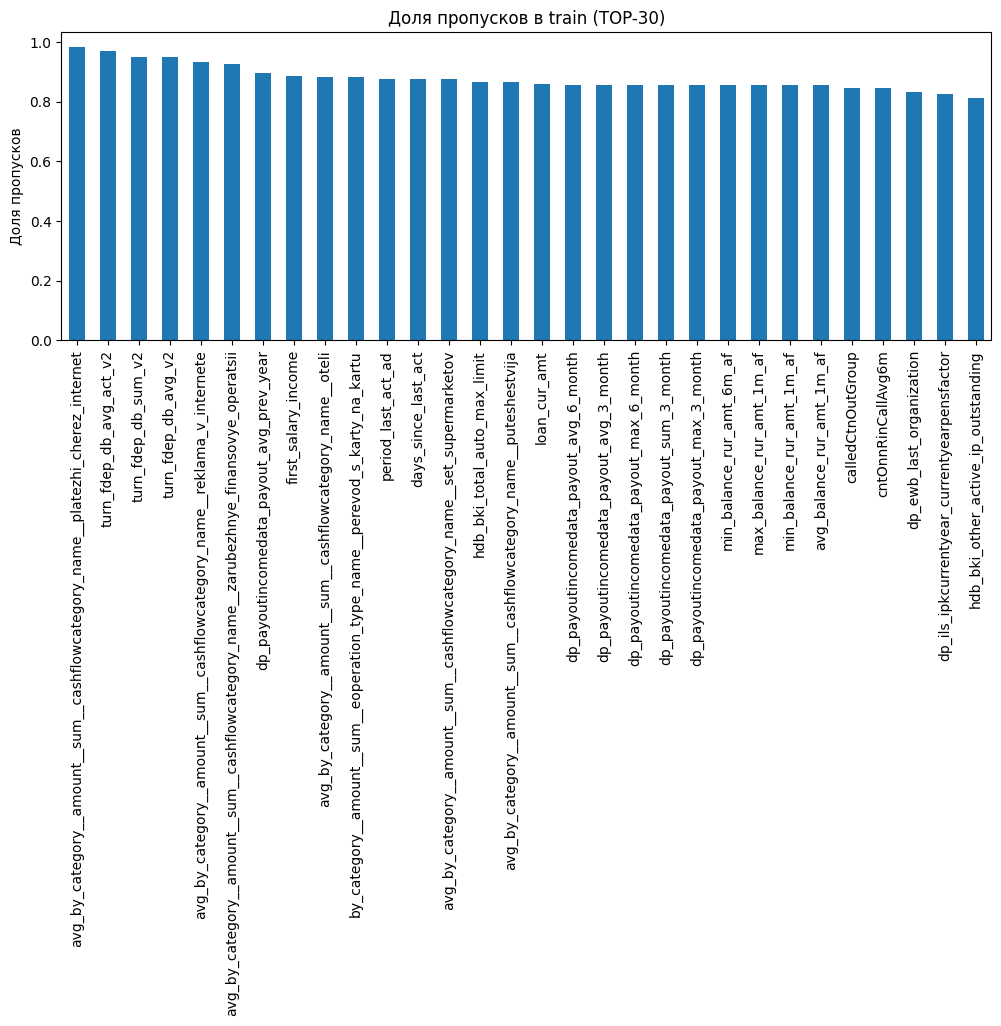

In [17]:
# Блок EDA-2: пропуски в train и test

missing_train = train.isna().mean().sort_values(ascending=False)
missing_test = test.isna().mean().sort_values(ascending=False)

print("TOP-30 признаков по доле пропусков в train:")
display(missing_train.head(30))

print("\nTOP-30 признаков по доле пропусков в test:")
display(missing_test.head(30))

# Визуализация пропусков для train (TOP-30)
top_n = 30
plt.figure(figsize=(12, 4))
missing_train.head(top_n).plot(kind="bar")
plt.title(f"Доля пропусков в train (TOP-{top_n})")
plt.ylabel("Доля пропусков")
plt.tight_layout()
plt.show()


In [18]:
# Блок M1: удаляем признаки с очень высокой долей пропусков

service_cols = [ID_COL, TARGET_COL, WEIGHT_COL]

raw_feature_cols = [c for c in train.columns if c not in service_cols]

na_train = train[raw_feature_cols].isna().mean()
na_test  = test[raw_feature_cols].isna().mean()

THRESH_HIGH_NA = 0.97

# 1) признаки, где доля NaN > порога и в train, и в test
high_na_both = na_train.index[(na_train > THRESH_HIGH_NA) & (na_test > THRESH_HIGH_NA)].tolist()

# 2) признаки, которые в test полностью пустые
all_na_test = na_test.index[na_test == 1.0].tolist()

# перечень кандидатов на удаление
cols_to_drop_high_na = sorted(set(high_na_both) | set(all_na_test))

print("Будем удалить признаков с очень высокой долей пропусков:", len(cols_to_drop_high_na))
print(cols_to_drop_high_na)

# удаляем из train и test
train = train.drop(columns=cols_to_drop_high_na)
test  = test.drop(columns=cols_to_drop_high_na)

print("\nTrain shape после удаления:", train.shape)
print("Test shape после удаления:", test.shape)

# пересчитываем списки фичей и разбиение на num/cat
feature_cols = [c for c in train.columns if c not in service_cols]
num_features = train[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
cat_features = [c for c in feature_cols if c not in num_features]

print("\nПосле дропа признаков с высоким NaN:")
print("Всего фичей:", len(feature_cols))
print("Числовых фичей:", len(num_features))
print("Категориальных фичей:", len(cat_features))


Будем удалить признаков с очень высокой долей пропусков: 2
['avg_by_category__amount__sum__cashflowcategory_name__platezhi_cherez_internet', 'first_salary_income']

Train shape после удаления: (76786, 228)
Test shape после удаления: (73214, 226)

После дропа признаков с высоким NaN:
Всего фичей: 225
Числовых фичей: 218
Категориальных фичей: 7


Очень много пустых признаков

In [19]:
# Блок EDA-3: диапазоны и summary по числовым признакам

num_desc = train[num_features].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).T
display(num_desc.head(20))  # первые 20 признаков

print("Всего числовых признаков в summary:", num_desc.shape[0])


,count,mean,std,min,1%,5%,50%,95%,99%,max
turn_cur_cr_avg_act_v2,59078.0,1.170105e+06,2.205263e+06,0.010000,100.000000,2300.000000,594020.437500,4.094268e+06,1.048292e+07,6.545863e+07
salary_6to12m_avg,14875.0,1.174897e+05,1.603782e+05,20003.739558,21769.843659,26796.156284,73092.407991,3.416337e+05,8.629996e+05,3.419392e+06
hdb_bki_total_max_limit,67413.0,1.353383e+06,2.261767e+06,0.000000,5000.000000,29300.000000,577200.000000,5.100000e+06,1.000176e+07,1.500000e+08
dp_ils_paymentssum_avg_12m,16503.0,2.162228e+05,2.538178e+05,2.648938,18562.015347,43942.278892,149711.981885,6.112565e+05,1.240706e+06,4.754632e+06
hdb_bki_total_cc_max_limit,63041.0,2.504806e+05,3.471460e+05,0.000000,0.000000,1500.000000,155000.000000,8.000000e+05,1.500000e+06,1.500000e+07
incomeValue,63817.0,8.168234e+04,5.130698e+04,0.000000,22027.000000,29345.000000,67474.000000,1.834088e+05,2.662666e+05,5.420840e+05
avg_cur_cr_turn,60214.0,1.866825e+05,4.615432e+05,0.000000,0.000000,0.000000,74361.500000,7.007000e+05,2.028762e+06,1.702021e+07
turn_cur_cr_avg_v2,59432.0,1.601873e+05,3.500297e+05,0.000000,2.500000,150.000000,67695.515833,5.925260e+05,1.648449e+06,1.328000e+07
turn_cur_cr_max_v2,59432.0,3.200456e+05,8.496348e+05,0.000000,25.000000,1138.964500,90000.000000,1.339445e+06,3.742918e+06,2.961870e+07
hdb_bki_total_pil_max_limit,62001.0,6.067355e+05,9.167729e+05,0.000000,5000.000000,19738.000000,338977.500000,2.017937e+06,4.330500e+06,3.900000e+07


Всего числовых признаков в summary: 218


In [20]:
# Сохранение summary числовых признаков
num_desc_path = DATA_DIR / "num_features_summary.csv"
num_desc.to_csv(num_desc_path)
print("Сводка по числовым признакам сохранена в:", num_desc_path)

Сводка по числовым признакам сохранена в: /content/drive/MyDrive/AlfaBand_HACK/num_features_summary.csv


Описательная статистика по таргету:


,target
count,7.678600e+04
mean,9.264824e+04
std,1.124090e+05
min,2.000000e+04
1%,2.040658e+04
5%,2.271157e+04
50%,6.275413e+04
95%,2.560746e+05
99%,5.965851e+05
max,1.500000e+06


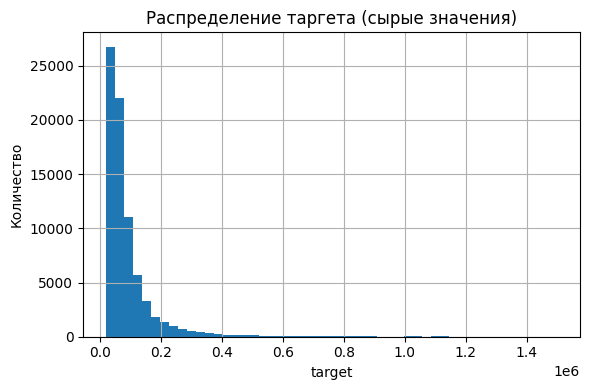

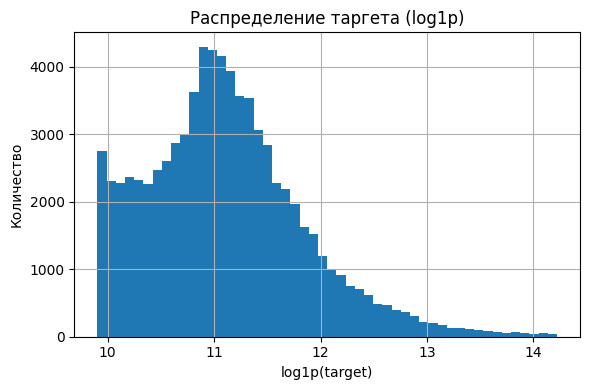

In [21]:
# Блок EDA-4: анализ распределения таргета

y = train[TARGET_COL]

print("Описательная статистика по таргету:")
display(y.describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]))

plt.figure(figsize=(6, 4))
y.hist(bins=50)
plt.title("Распределение таргета (сырые значения)")
plt.xlabel(TARGET_COL)
plt.ylabel("Количество")
plt.tight_layout()
plt.show()

# Лог-преобразованный таргет (для наглядности)
plt.figure(figsize=(6, 4))
np.log1p(y).hist(bins=50)
plt.title("Распределение таргета (log1p)")
plt.xlabel(f"log1p({TARGET_COL})")
plt.ylabel("Количество")
plt.tight_layout()
plt.show()


TOP-30 признаков по |corr| с таргетом:


,target
salary_6to12m_avg,0.927699
dp_payoutincomedata_payout_avg_6_month,0.672173
dp_payoutincomedata_payout_avg_3_month,0.644840
dp_payoutincomedata_payout_sum_3_month,0.644542
turn_cur_db_avg_act_v2,0.640399
turn_cur_cr_avg_act_v2,0.638592
dp_payoutincomedata_payout_avg_prev_year,0.630530
turn_cur_cr_sum_v2,0.630285
turn_cur_cr_avg_v2,0.630285
turn_cur_db_sum_v2,0.628880


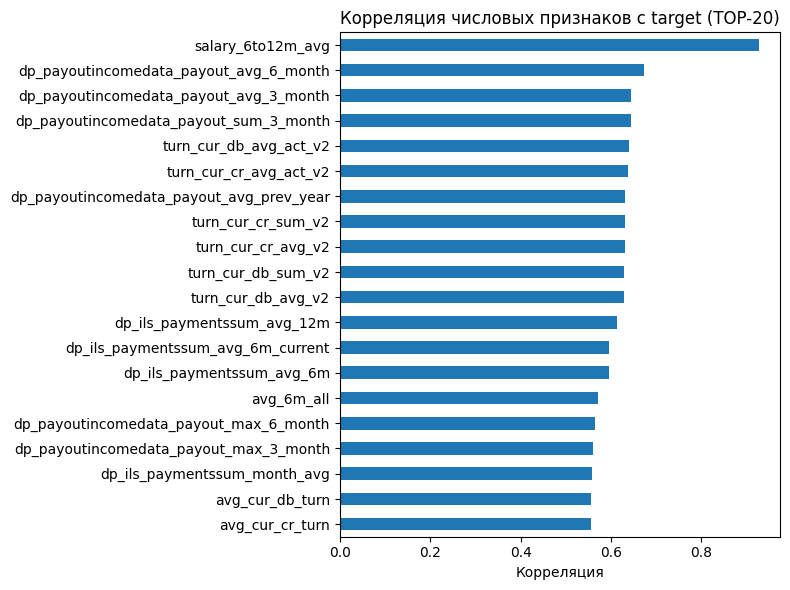

In [22]:
# Блок EDA-5: корелляции числовых признаков с таргетом

# Берём только те числовые фичи, где нет полностью константных значений
num_for_corr = [c for c in num_features if train[c].nunique() > 1]

corr_matrix = train[num_for_corr + [TARGET_COL]].corr()
target_corr = corr_matrix[TARGET_COL].drop(TARGET_COL).sort_values(key=lambda x: x.abs(), ascending=False)

print("TOP-30 признаков по |corr| с таргетом:")
display(target_corr.head(30))

# Визуализация TOP-20
top_k = 20
plt.figure(figsize=(8, 6))
target_corr.head(top_k).sort_values().plot(kind="barh")
plt.title(f"Корреляция числовых признаков с {TARGET_COL} (TOP-{top_k})")
plt.xlabel("Корреляция")
plt.tight_layout()
plt.show()



=== gender ===


,count,mean,median
gender,,,
Мужской,40121,106700.581424,71513.320826
Женский,36665,77271.348093,55134.307987


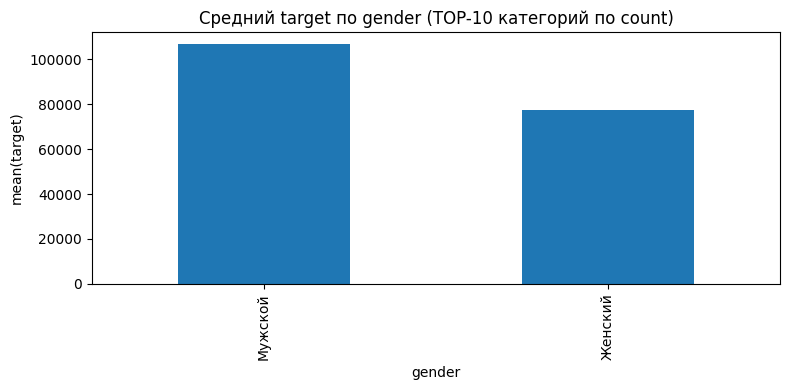


=== city_smart_name ===


,count,mean,median
city_smart_name,,,
Москва,23230,118297.195757,74778.308573
Санкт-Петербург,4843,97183.287313,69134.710000
Екатеринбург,2439,88889.679561,60038.870000
Краснодар,1786,83338.207468,58918.642316
Новосибирск,1366,84178.040378,58062.314130
Самара,1275,77889.785514,56931.960985
Красноярск,1267,79552.286984,55984.291200
Омск,1266,76543.237085,55379.913361
Челябинск,1177,76531.642963,57266.540000


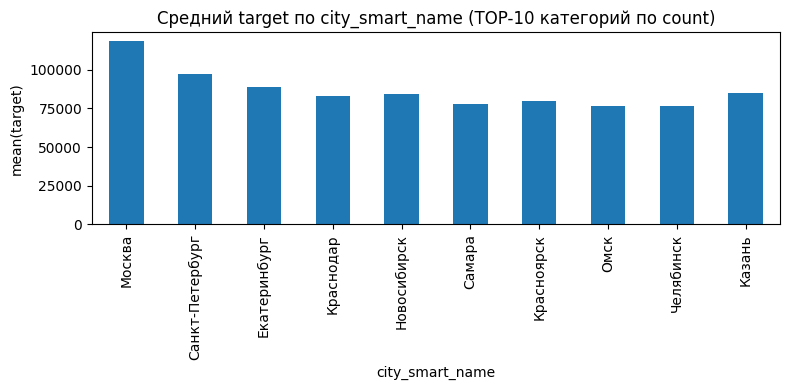

In [23]:
# Блок EDA-6: таргет по категориям для нескольких фичей

# выберем вручную несколько категориальных фичей для анализа
cat_to_check = [c for c in ["gender", "incomeValueCategory", "city_smart_name"] if c in cat_features]

def show_target_by_category(df, cat_col, target_col, top_n=10):
    print(f"\n=== {cat_col} ===")
    stats = (
        df.groupby(cat_col)[target_col]
        .agg(["count", "mean", "median"])
        .sort_values("count", ascending=False)
        .head(top_n)
    )
    display(stats)

    plt.figure(figsize=(8, 4))
    stats["mean"].plot(kind="bar")
    plt.title(f"Средний {target_col} по {cat_col} (TOP-{top_n} категорий по count)")
    plt.ylabel(f"mean({target_col})")
    plt.tight_layout()
    plt.show()

for col in cat_to_check:
    show_target_by_category(train, col, TARGET_COL, top_n=10)


Сделаем черновой CatBoostRegressor только ради feature importance. Это и ML-разведка, и «analysis of feature importance» для отчёта.

In [24]:
!pip install -q catboost
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


TOP-30 признаков по важности (CatBoost):


,0
salary_6to12m_avg,26.125366
turn_cur_cr_avg_act_v2,8.440987
hdb_bki_total_max_limit,4.070710
hdb_bki_total_cc_max_limit,2.015400
incomeValue,1.749194
turn_cur_db_avg_act_v2,1.744581
avg_by_category__amount__sum__cashflowcategory_name__vydacha_nalichnyh_v_bankomate,1.734844
hdb_bki_total_pil_max_limit,1.724187
turn_cur_cr_avg_v2,1.710736
by_category__amount__sum__eoperation_type_name__ishodjaschij_bystryj_platezh_sbp,1.701230


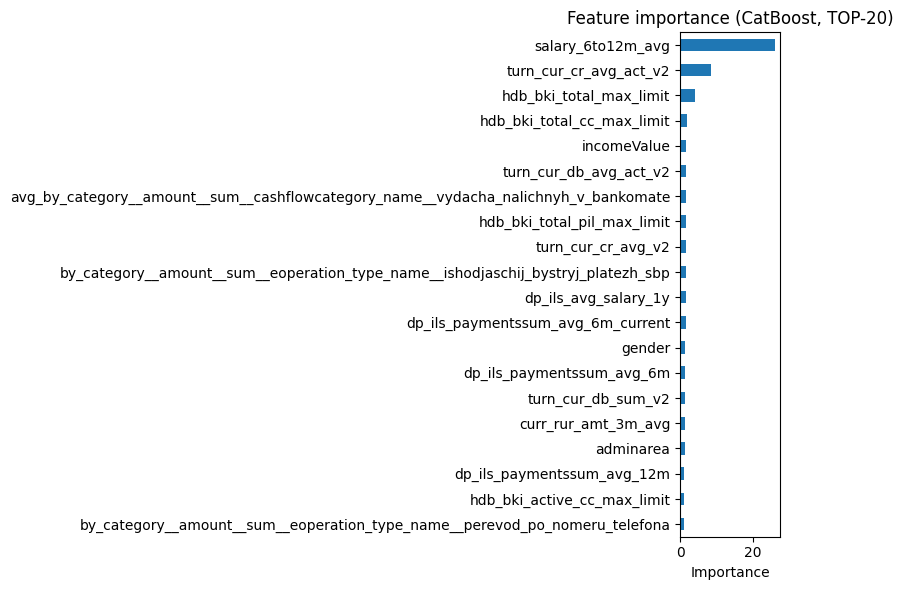

In [25]:
# Блок EDA-7: черновая модель CatBoost для feature importance

X = train[feature_cols].copy()
y = train[TARGET_COL].copy()
w = train[WEIGHT_COL].copy()

# Пропуски в категориальных → "NA"
X[cat_features] = X[cat_features].fillna("NA")
# Приводим весь категориальный блок к строковому типу
X[cat_features] = X[cat_features].astype(str)


# Индексы категориальных признаков для CatBoost
cat_idx = [X.columns.get_loc(c) for c in cat_features]

model_eda = CatBoostRegressor(
    depth=6,
    learning_rate=0.1,
    loss_function="MAE",
    random_seed=42,
    n_estimators=300,
    verbose=False
)

model_eda.fit(X, y, cat_features=cat_idx, sample_weight=w)

importances = model_eda.get_feature_importance()
fi = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("TOP-30 признаков по важности (CatBoost):")
display(fi.head(30))

# Визуализация TOP-20
top_k = 20
plt.figure(figsize=(8, 6))
fi.head(top_k).sort_values().plot(kind="barh")
plt.title(f"Feature importance (CatBoost, TOP-{top_k})")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [26]:
# Блок M2: фичи с высокой долей NaN и низкой важностью (кандидаты на дроп)

na_share = train[feature_cols].isna().mean()

fi_df = (
    pd.DataFrame({
        "feature": feature_cols,
        "importance": fi.reindex(feature_cols).fillna(0).values,
        "na_share": na_share.values,
    })
)

NA_THRESHOLD = 0.5      # "много пропусков"
IMP_THRESHOLD = fi_df["importance"].quantile(0.1)  # нижние 10% по важности

candidates = fi_df[
    (fi_df["na_share"] > NA_THRESHOLD) &
    (fi_df["importance"] <= IMP_THRESHOLD)
].sort_values(by=["importance", "na_share"], ascending=[True, False])

print("Фичи с высокой долей NaN и низкой важностью (кандидаты на удаление):")
display(candidates.head(50))

cols_to_maybe_drop_later = candidates["feature"].tolist()
print("\nВсего кандидатов на дроп по этому критерию:", len(cols_to_maybe_drop_later))


Фичи с высокой долей NaN и низкой важностью (кандидаты на удаление):


,feature,importance,na_share
224,days_since_last_act,0.0,0.877933
44,dp_ewb_last_employment_position,0.0,0.803597
131,dp_ewb_dismissal_due_contract_violation_by_lb_cnt,0.0,0.788907
169,dp_ils_days_ip_share_5y,0.0,0.785404
135,dp_ils_employeers_cnt_last_month,0.0,0.785078
134,dp_ils_cnt_changes_1y,0.0,0.783971
170,hdb_bki_total_micro_max_overdue,0.0,0.753679



Всего кандидатов на дроп по этому критерию: 7


In [27]:
# Блок FEATS-DR-1: удаляем кандидатов на дроп из feature_cols

print("До дропа по NaN+FI, число фич:", len(feature_cols))

# предполагаем, что cols_to_maybe_drop_later уже посчитан в Блоке M2
feature_cols = [c for c in feature_cols if c not in cols_to_maybe_drop_later]

print("После дропа по NaN+FI, число фич:", len(feature_cols))

До дропа по NaN+FI, число фич: 225
После дропа по NaN+FI, число фич: 218


In [28]:
# Блок M3: финальный дроп "мало важных" фич с большой долей NaN

print("Дропаем кандидатов на удаление:", len(cols_to_maybe_drop_later))
print(cols_to_maybe_drop_later)

# служебные колонки
service_cols = [ID_COL, TARGET_COL, WEIGHT_COL]

# удаляем из train и test
train = train.drop(columns=cols_to_maybe_drop_later)
test  = test.drop(columns=cols_to_maybe_drop_later)

print("\nTrain shape после M3:", train.shape)
print("Test shape после M3:", test.shape)

# пересчитываем списки фичей и разбиение на num/cat
feature_cols = [c for c in train.columns if c not in service_cols]
num_features = train[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
cat_features = [c for c in feature_cols if c not in num_features]

print("\nПосле дропа мало важных фич:")
print("Всего фичей:", len(feature_cols))
print("Числовых фичей:", len(num_features))
print("Категориальных фичей:", len(cat_features))


Дропаем кандидатов на удаление: 7
['days_since_last_act', 'dp_ewb_last_employment_position', 'dp_ewb_dismissal_due_contract_violation_by_lb_cnt', 'dp_ils_days_ip_share_5y', 'dp_ils_employeers_cnt_last_month', 'dp_ils_cnt_changes_1y', 'hdb_bki_total_micro_max_overdue']

Train shape после M3: (76786, 221)
Test shape после M3: (73214, 219)

После дропа мало важных фич:
Всего фичей: 218
Числовых фичей: 212
Категориальных фичей: 6


In [29]:
# Блок TARGET-CLEAN: мягкая чистка хвостов таргета и флаг

y_raw = train[TARGET_COL].copy()

low_q, high_q = y_raw.quantile([0.001, 0.999])  # 0.1% и 99.9% квантили
print(f"\n[Target clean] Квантили таргета: low_q={low_q:.2f}, high_q={high_q:.2f}")

mask_clip = (y_raw < low_q) | (y_raw > high_q)
print("[Target clean] Объектов, попавших в хвосты (будем клипать):", mask_clip.sum())

# флаг «был в хвосте»
train["is_target_clipped"] = mask_clip.astype(int)
test["is_target_clipped"] = 0

# сам таргет клипаем до [low_q, high_q]
train[TARGET_COL] = y_raw.clip(low_q, high_q)

# добавляем новую фичу в списки
if "is_target_clipped" not in feature_cols:
    feature_cols.append("is_target_clipped")
if "is_target_clipped" not in num_features:
    num_features.append("is_target_clipped")

print("[Target clean] is_target_clipped добавлен в фичи. Всего фич теперь:", len(feature_cols))



[Target clean] Квантили таргета: low_q=20010.00, high_q=1291317.06
[Target clean] Объектов, попавших в хвосты (будем клипать): 111
[Target clean] is_target_clipped добавлен в фичи. Всего фич теперь: 219


/tmp/ipython-input-1555495380.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train["is_target_clipped"] = mask_clip.astype(int)
/tmp/ipython-input-1555495380.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test["is_target_clipped"] = 0  # про тест не знаем, но фичу оставляем


In [30]:
service_cols = [ID_COL, TARGET_COL, WEIGHT_COL]

# пересобираем актуальный список фичей
feature_cols = [c for c in train.columns if c not in service_cols]

# делим на числовые и категориальные по факту текущего train
num_features = train[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
cat_features = [c for c in feature_cols if c not in num_features]

print("Финальный список фичей после всех дропов:")
print("Всего фич:", len(feature_cols))
print("Числовых:", len(num_features))
print("Категориальных:", len(cat_features))

Финальный список фичей после всех дропов:
Всего фич: 219
Числовых: 213
Категориальных: 6


In [31]:
# Блок EDA-8: поиск текстовых колонок и простое текстовое EDA

def detect_text_like_cols(df, cat_cols, min_avg_len=10, min_unique_ratio=0.1):
    text_cols = []
    for col in cat_cols:
        s = df[col].dropna().astype(str)
        if s.empty:
            continue
        avg_len = s.str.len().mean()
        uniq_ratio = s.nunique() / len(s)
        if avg_len >= min_avg_len and uniq_ratio >= min_unique_ratio:
            text_cols.append(col)
    return text_cols

text_like_cols = detect_text_like_cols(train, cat_features)
print("Найдено текстоподобных колонок:", len(text_like_cols))
print(text_like_cols)


Найдено текстоподобных колонок: 0
[]


In [32]:
if text_like_cols:
    text_col = text_like_cols[0]
    print("Проводим текстовый EDA по колонке:", text_col)

    s = train[text_col].dropna().astype(str)

    # Простейшая токенизация по пробелам
    all_words = " ".join(s.tolist()).lower().split()
    from collections import Counter
    word_counts = Counter(all_words)

    print("\nTOP-30 самых частых слов:")
    display(pd.DataFrame(word_counts.most_common(30), columns=["word", "count"]))

    # WordCloud (опционально)
    !pip install -q wordcloud
    from wordcloud import WordCloud

    text_sample = " ".join(s.sample(min(len(s), 5000), random_state=42).tolist())
    wc = WordCloud(width=800, height=400)
    wc.generate(text_sample)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"WordCloud для {text_col}")
    plt.tight_layout()
    plt.show()
else:
    print("Текстовых колонок с подходящими характеристиками не найдено — текстовый EDA можно пропустить.")


Текстовых колонок с подходящими характеристиками не найдено — текстовый EDA можно пропустить.


# Блок ML-1: импорты и метрика WMAE


In [33]:
# Основные матрицы для CatBoost
X = train[feature_cols].copy()
y = train[TARGET_COL].copy()
w = train[WEIGHT_COL].copy()

X_test = test[feature_cols].copy()

# Категориальные в строку для CatBoost
for col in cat_features:
    X[col] = X[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Индексы категориальных для CatBoost
cat_idx = [X.columns.get_loc(c) for c in cat_features]

print("X shape:", X.shape, "X_test shape:", X_test.shape)
print("cat_features:", len(cat_features))

# Матрицы для LightGBM
X_lgb = X.copy()
X_test_lgb = X_test.copy()

for col in cat_features:
    X_lgb[col] = X_lgb[col].astype('category')
    X_test_lgb[col] = X_test_lgb[col].astype('category')

X shape: (76786, 219) X_test shape: (73214, 219)
cat_features: 6


In [34]:
# Блок ML-1: импорты и метрика WMAE

from sklearn.model_selection import KFold
import numpy as np
import pandas as pd

def wmae(y_true, y_pred, weights=None):
    """
    Weighted Mean Absolute Error
    """
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    if weights is None:
        weights = np.ones_like(y_true, dtype=float)
    else:
        weights = np.asarray(weights, dtype=float)
    return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)
def mae(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    mask = y_true != 0
    return (np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])).mean() * 100

def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    denom = (np.abs(y_true) + np.abs(y_pred)) / 2
    mask = denom != 0
    return (np.abs(y_true - y_pred)[mask] / denom[mask]).mean() * 100

def quality_by_quantiles(y_true, y_pred, w, q=None):
    """
    Разбор качества по квантилям таргета.
    q - список квантилей, по умолчанию 0,20,40,60,80,100%.
    """
    if q is None:
        q = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    w = np.asarray(w)

    borders = np.quantile(y_true, q)
    print("\n[Segmentation] Границы квантилей по таргету:", borders)

    for i in range(len(borders) - 1):
        left, right = borders[i], borders[i+1]

        # включаем левую, правую границу
        mask = (y_true >= left) & (y_true <= right)
        if mask.sum() == 0:
            continue

        seg_y = y_true[mask]
        seg_p = y_pred[mask]
        seg_w = w[mask]

        print(f"\nSegment {i+1}: [{left:.0f}, {right:.0f}], n={mask.sum()}")
        print("  WMAE :", wmae(seg_y, seg_p, seg_w))
        print("  MAPE :", mape(seg_y, seg_p))
        print("  SMAPE:", smape(seg_y, seg_p))



In [35]:
# Блок BASELINE-1: sanity-check для incomeValue и per_capita_income_rur_amt

y_true = train[TARGET_COL].values
w_true = train[WEIGHT_COL].values

baseline_results = {}

for col in ['incomeValue', 'per_capita_income_rur_amt']:
    if col in train.columns:
        # приведём к числу
        y_base = pd.to_numeric(train[col], errors='coerce')
        # простая обработка NaN: заменим на медиану по колонке
        y_base = y_base.fillna(y_base.median()).values

        score = wmae(y_true, y_base, w_true)
        baseline_results[col] = score
        print(f"Baseline WMAE, pred = {col}: {score:.2f}")

# Попробуем простую смесь этих двух baseline'ов
if 'incomeValue' in baseline_results and 'per_capita_income_rur_amt' in baseline_results:
    inc = pd.to_numeric(train['incomeValue'], errors='coerce').fillna(train['incomeValue'].median())
    pci = pd.to_numeric(train['per_capita_income_rur_amt'], errors='coerce').fillna(train['per_capita_income_rur_amt'].median())

    # среднее двух оценок
    blend = 0.5 * inc + 0.5 * pci
    blend_score = wmae(y_true, blend.values, w_true)
    print(f"Baseline WMAE, pred = 0.5*incomeValue + 0.5*per_capita_income_rur_amt: {blend_score:.2f}")


Baseline WMAE, pred = incomeValue: 110667.56
Baseline WMAE, pred = per_capita_income_rur_amt: 125159.55
Baseline WMAE, pred = 0.5*incomeValue + 0.5*per_capita_income_rur_amt: 115633.99


In [36]:
# Блок ML-2: формируем матрицу признаков и таргет (без логов)

X = train[feature_cols].copy()
y = train[TARGET_COL].copy()
w = train[WEIGHT_COL].copy()

X_test = test[feature_cols].copy()

for col in cat_features:
    X[col] = X[col].astype(str)
    X_test[col] = X_test[col].astype(str)

print("X shape:", X.shape)
print("X_test shape:", X_test.shape)
print("Target shape:", y.shape)

X shape: (76786, 219)
X_test shape: (73214, 219)
Target shape: (76786,)


In [37]:
y_log = np.log1p(y)

print("Пример y vs y_log:")
print(pd.DataFrame({
    "y": y.head(5),
    "y_log": y_log.head(5)
}))

Пример y vs y_log:
               y      y_log
0  109324.476325  11.602085
1   25558.028662  10.148746
2   40666.753098  10.613191
3   43856.672058  10.688705
4  130420.851992  11.778529


In [38]:
!pip install -q catboost
from catboost import CatBoostRegressor, Pool

In [39]:
# Блок ENS-0: установка LightGBM (Colab)
!pip install lightgbm -q

import lightgbm as lgb

In [40]:
# Блок ENS-1: подготовка данных для LightGBM

# Берём те же матрицы признаков, что и для CatBoost
X_lgb = X.copy()
X_test_lgb = X_test.copy()

# Для LightGBM категориальные признаки делаем pandas.Categorical
for col in cat_features:
    if col in X_lgb.columns:
        X_lgb[col] = X_lgb[col].astype('category')
        X_test_lgb[col] = X_test_lgb[col].astype('category')

print("Форма X_lgb:", X_lgb.shape)
print("Форма X_test_lgb:", X_test_lgb.shape)


Форма X_lgb: (76786, 219)
Форма X_test_lgb: (73214, 219)


In [41]:
# Блок ML-3: CatBoost и индексы категориальных признаков

# индексы категориальных колонок
cat_idx = [X.columns.get_loc(c) for c in cat_features]
print("Категориальных признаков:", len(cat_idx))


Категориальных признаков: 6


In [42]:
# Блок ML-4-TIME-LOG: time-based CV с лог-таргетом (CatBoost)

from sklearn.model_selection import TimeSeriesSplit

N_FOLDS = 5

# сортируем train по времени
train_sorted = train.sort_values('dt').reset_index(drop=True)

X_ts = train_sorted[feature_cols].copy()
y_ts = train_sorted[TARGET_COL].copy()
w_ts = train_sorted[WEIGHT_COL].copy()

# лог-таргет для обучения
y_ts_log = np.log1p(y_ts)

# категориальные → str для CatBoost
for col in cat_features:
    X_ts[col] = X_ts[col].astype(str)

cat_idx_ts = [X_ts.columns.get_loc(c) for c in cat_features]

tscv = TimeSeriesSplit(n_splits=N_FOLDS)

# здесь будем хранить OOF-предсказания в РУБЛЯХ
oof_pred_ts_log = np.zeros(len(X_ts))
fold_scores_ts_log = []
fold_models_ts_log = []

print(f"Time-based CV (LOG): {N_FOLDS} фолдов по dt")

for fold, (tr_idx, val_idx) in enumerate(tscv.split(X_ts), 1):
    print(f"\n========== Time Fold {fold}/{N_FOLDS} ==========")

    X_tr, X_val = X_ts.iloc[tr_idx], X_ts.iloc[val_idx]
    y_tr_log = y_ts_log.iloc[tr_idx]   # лог-таргет
    y_val_log = y_ts_log.iloc[val_idx]
    y_val = y_ts.iloc[val_idx]         # таргет в рублях
    w_tr, w_val = w_ts.iloc[tr_idx], w_ts.iloc[val_idx]

    train_pool = Pool(X_tr, y_tr_log, cat_features=cat_idx_ts, weight=w_tr)
    valid_pool = Pool(X_val, y_val_log, cat_features=cat_idx_ts, weight=w_val)

    model = CatBoostRegressor(
        depth=6,
        learning_rate=0.05,
        l2_leaf_reg=6.0,
        loss_function="MAE",
        eval_metric="MAE",
        random_seed=42,
        n_estimators=2000,
        od_type="Iter",
        od_wait=100,
        verbose=200,
    )

    model.fit(train_pool, eval_set=valid_pool)

    # предсказания в логах → переводим в рубли
    val_pred_log = model.predict(X_val)
    val_pred = np.expm1(val_pred_log)

    oof_pred_ts_log[val_idx] = val_pred

    fold_wmae = wmae(y_val, val_pred, w_val)
    fold_scores_ts_log.append(fold_wmae)
    print(f"Time Fold {fold} WMAE (рубли): {fold_wmae:.2f}")
    print("MAE:", mae(y_val, val_pred))
    print("RMSE:", rmse(y_val, val_pred))
    print("MAPE:", mape(y_val, val_pred))
    print("SMAPE:", smape(y_val, val_pred))


    fold_models_ts_log.append(model)

print("\n========== Time-based CV Results (LOG) ==========")
print("Fold WMAE:", fold_scores_ts_log)
print("Mean WMAE:", np.mean(fold_scores_ts_log))
print("Std  WMAE:", np.std(fold_scores_ts_log))

overall_wmae_ts_log = wmae(y_ts, oof_pred_ts_log, w_ts)
print("Overall OOF WMAE (TIME CV, LOG → рубли):", overall_wmae_ts_log)
print("\nРазбор качества по квантилям таргета (TimeCV, OOF):")
quality_by_quantiles(y_ts.values, oof_pred_ts_log, w_ts.values)



Time-based CV (LOG): 5 фолдов по dt

========== Time Fold 1/5 ==========
0:	learn: 0.9446364	test: 0.9629677	best: 0.9629677 (0)	total: 217ms	remaining: 7m 13s
200:	learn: 0.5331997	test: 0.5477027	best: 0.5477027 (200)	total: 31.5s	remaining: 4m 41s
400:	learn: 0.4987121	test: 0.5328030	best: 0.5328030 (400)	total: 47.6s	remaining: 3m 9s
600:	learn: 0.4819364	test: 0.5271387	best: 0.5271387 (600)	total: 1m 5s	remaining: 2m 32s
800:	learn: 0.4714389	test: 0.5238313	best: 0.5238313 (800)	total: 1m 22s	remaining: 2m 3s
1000:	learn: 0.4632943	test: 0.5221035	best: 0.5220907 (997)	total: 1m 38s	remaining: 1m 38s
1200:	learn: 0.4576348	test: 0.5209972	best: 0.5209972 (1200)	total: 1m 55s	remaining: 1m 16s
1400:	learn: 0.4524317	test: 0.5198737	best: 0.5198737 (1400)	total: 2m 11s	remaining: 56.2s
1600:	learn: 0.4483219	test: 0.5195410	best: 0.5194466 (1584)	total: 2m 28s	remaining: 37s
1800:	learn: 0.4445691	test: 0.5186725	best: 0.5186536 (1782)	total: 2m 46s	remaining: 18.4s
1999:	learn: 

In [43]:
# Блок ML-5a-LOG-TIME: holdout по времени + лог-таргет (CatBoost)

from catboost import CatBoostRegressor, Pool

# сортируем по дате
train_sorted = train.sort_values('dt').reset_index(drop=True)

X_all = train_sorted[feature_cols].copy()
y_all = train_sorted[TARGET_COL].copy()
w_all = train_sorted[WEIGHT_COL].copy()

y_all_log = np.log1p(y_all)

# категориальные → str
for col in cat_features:
    X_all[col] = X_all[col].astype(str)

cat_idx_all = [X_all.columns.get_loc(c) for c in cat_features]

# 85% старых дат на train, 15% самых свежих — holdout
split_idx = int(0.85 * len(train_sorted))

X_tr_cb = X_all.iloc[:split_idx]
X_val_cb = X_all.iloc[split_idx:]

y_tr_log = y_all_log.iloc[:split_idx]
y_val_log = y_all_log.iloc[split_idx:]
y_val_rub_cb = y_all.iloc[split_idx:]
w_tr_cb = w_all.iloc[:split_idx]
w_val_cb = w_all.iloc[split_idx:]

train_pool_final = Pool(X_tr_cb, y_tr_log, cat_features=cat_idx_all, weight=w_tr_cb)
val_pool_final   = Pool(X_val_cb, y_val_log, cat_features=cat_idx_all, weight=w_val_cb)

tmp_model_log = CatBoostRegressor(
    depth=6,
    learning_rate=0.05,
    l2_leaf_reg=6.0,
    loss_function="MAE",
    eval_metric="MAE",
    random_seed=42,
    n_estimators=3000,
    random_strength=1.0,
    bagging_temperature=0.0,
    subsample=1.0,
    rsm=1.0,
    od_type="Iter",
    od_wait=150,
    verbose=200,
)

tmp_model_log.fit(train_pool_final, eval_set=val_pool_final)

best_iter_log = tmp_model_log.get_best_iteration()
print("Best iteration (tmp_model_log):", best_iter_log)

val_pred_log_cb = tmp_model_log.predict(X_val_cb)
val_pred_cb = np.expm1(val_pred_log_cb)
val_wmae_cb = wmae(y_val_rub_cb, val_pred_cb, w_val_cb)
print("Holdout WMAE CatBoost (LOG → рубли):", val_wmae_cb)


0:	learn: 0.9468784	test: 0.9434080	best: 0.9434080 (0)	total: 388ms	remaining: 19m 23s
200:	learn: 0.5097594	test: 0.5141457	best: 0.5141457 (200)	total: 42.3s	remaining: 9m 49s
400:	learn: 0.4780394	test: 0.4886693	best: 0.4886693 (400)	total: 1m 22s	remaining: 8m 54s
600:	learn: 0.4648535	test: 0.4805421	best: 0.4804595 (597)	total: 2m 3s	remaining: 8m 14s
800:	learn: 0.4569267	test: 0.4762951	best: 0.4762951 (800)	total: 2m 46s	remaining: 7m 37s
1000:	learn: 0.4517364	test: 0.4739191	best: 0.4739191 (1000)	total: 3m 27s	remaining: 6m 53s
1200:	learn: 0.4477076	test: 0.4722205	best: 0.4721887 (1189)	total: 4m 8s	remaining: 6m 11s
1400:	learn: 0.4444810	test: 0.4713758	best: 0.4713758 (1400)	total: 4m 49s	remaining: 5m 30s
1600:	learn: 0.4416610	test: 0.4703723	best: 0.4703042 (1592)	total: 5m 31s	remaining: 4m 49s
1800:	learn: 0.4392040	test: 0.4696773	best: 0.4696703 (1799)	total: 6m 12s	remaining: 4m 7s
2000:	learn: 0.4368144	test: 0.4689104	best: 0.4688784 (1992)	total: 6m 52s	re

In [44]:
# Блок ENS-LOG-1: LightGBM c лог-таргетом и тем же time-holdout

from lightgbm import LGBMRegressor
from lightgbm.callback import early_stopping as lgb_early_stopping, log_evaluation as lgb_log_evaluation

# 1. Матрица признаков для LGBM в том же порядке, что X_all
X_all_lgb = train_sorted[feature_cols].copy()

for col in cat_features:
    if col in X_all_lgb.columns:
        X_all_lgb[col] = X_all_lgb[col].astype(str).astype("category")

X_tr_lgb = X_all_lgb.iloc[:split_idx]
X_val_lgb = X_all_lgb.iloc[split_idx:]

y_tr_log_lgb = y_all_log.iloc[:split_idx]
y_val_log_lgb = y_all_log.iloc[split_idx:]
y_val_rub_lgb = y_all.iloc[split_idx:]
w_tr_lgb = w_all.iloc[:split_idx]
w_val_lgb = w_all.iloc[split_idx:]

print("Shapes LGBM (LOG):")
print("  X_tr_lgb:", X_tr_lgb.shape)
print("  X_val_lgb:", X_val_lgb.shape)

lgb_log_params = dict(
    objective="mae",
    metric="mae",
    random_state=42,
    n_estimators=3000,
    learning_rate=0.05,
    num_leaves=31,
    feature_fraction=0.9,
    bagging_fraction=0.9,
    bagging_freq=1,
    n_jobs=-1,
)

lgb_model_log_tmp = LGBMRegressor(**lgb_log_params)

lgb_model_log_tmp.fit(
    X_tr_lgb,
    y_tr_log_lgb,
    sample_weight=w_tr_lgb,
    eval_set=[(X_val_lgb, y_val_log_lgb)],
    eval_sample_weight=[w_val_lgb],
    callbacks=[
        lgb_early_stopping(stopping_rounds=200),
        lgb_log_evaluation(period=200),
    ],
)

print("Best iteration (LGBM LOG):", lgb_model_log_tmp.best_iteration_)

val_pred_lgb_log = lgb_model_log_tmp.predict(
    X_val_lgb,
    num_iteration=lgb_model_log_tmp.best_iteration_
)
val_pred_lgb = np.expm1(val_pred_lgb_log)

lgb_log_holdout_wmae = wmae(y_val_rub_lgb, val_pred_lgb, w_val_lgb)
print(f"Holdout WMAE LGBM (LOG → рубли): {lgb_log_holdout_wmae:.2f}")


Shapes LGBM (LOG):
  X_tr_lgb: (65268, 219)
  X_val_lgb: (11518, 219)
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.410152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 44253
[LightGBM] [Info] Number of data po

In [47]:
# Блок ENS-LOG-2: подбор alpha для ансамбля (CatBoost LOG + LGBM LOG)

# 1. Предсказания в лог-пространстве на holdout
cat_val_pred_log = tmp_model_log.predict(X_val_cb)
lgb_val_pred_log = lgb_model_log_tmp.predict(
    X_val_lgb,
    num_iteration=lgb_model_log_tmp.best_iteration_
)

# 2. Подбор alpha: ансамбль в лог-пространстве, метрика в рублях
alphas = [a / 20.0 for a in range(0, 21)]  # 0.00, 0.05, ..., 1.00
alpha_scores_log = []

print("\nПодбор alpha для LOG-ансамбля (CatBoost+LGBM):")

for a in alphas:
    blend_log = a * cat_val_pred_log + (1.0 - a) * lgb_val_pred_log
    blend = np.expm1(blend_log)
    score = wmae(y_val_rub_lgb, blend, w_val_lgb)
    alpha_scores_log.append((a, score))
    print(f"alpha = {a:.2f} -> WMAE = {score:.2f}")

# 3. Лучшая alpha
ENS_ALPHA_LOG, best_alpha_score_log = min(alpha_scores_log, key=lambda x: x[1])

print("\nЛучший alpha (LOG-ансамбль):")
print(f"ENS_ALPHA_LOG = {ENS_ALPHA_LOG:.2f}, WMAE = {best_alpha_score_log:.2f}")


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9

Подбор alpha для LOG-ансамбля (CatBoost+LGBM):
alpha = 0.00 -> WMAE = 61450.92
alpha = 0.05 -> WMAE = 61533.60
alpha = 0.10 -> WMAE = 61673.87
alpha = 0.15 -> WMAE = 61865.42
alpha = 0.20 -> WMAE = 62114.57
alpha = 0.25 -> WMAE = 62407.50
alpha = 0.30 -> WMAE = 62732.64
alpha = 0.35 -> WMAE = 63095.01
alpha = 0.40 -> WMAE = 63489.87
alpha = 0.45 -> WMAE = 63903.75
alpha = 0.50 -> WMAE = 64350.89
alpha = 0.55 -> WMAE = 64828.85
alpha = 0.60 -> WMAE = 65334.36
alpha = 0.65 -> WMAE = 65865.86
alpha = 0.70 -> WMAE = 66408.60
alpha = 0.75 -> WMAE = 66962.09
alpha = 0.80 -> WMAE = 67532.15
alpha = 0.85 -> WMAE = 68122.04
alpha = 0.90 -> WMAE = 6872

In [ ]:
# Блок ENS-LOG-3: финальные LOG-модели на всех данных + сабмит

from pathlib import Path
import joblib

# 1. Финальный CatBoost на лог-таргете, на всех данных (без eval_set)

full_train_pool_log = Pool(
    X_all,          # train_sorted[feature_cols], тот же порядок
    y_all_log,      # log1p(target)
    cat_features=cat_idx_all,
    weight=w_all
)

# используем найденный best_iter_log
final_cat_log = CatBoostRegressor(
    depth=6,
    learning_rate=0.05,
    l2_leaf_reg=6.0,
    loss_function="MAE",
    random_seed=42,
    n_estimators=int(best_iter_log),
    verbose=200,
)

final_cat_log.fit(full_train_pool_log)

# 2. Финальный LGBM на лог-таргете, на всех данных

final_lgb_log_params = dict(lgb_log_params)
final_lgb_log_params["n_estimators"] = int(lgb_model_log_tmp.best_iteration_)

final_lgb_log = LGBMRegressor(**final_lgb_log_params)
final_lgb_log.fit(X_all_lgb, y_all_log, sample_weight=w_all)

# 3. WMAE ансамбля на train (для контроля), в рублях

cat_train_pred_log_full = final_cat_log.predict(X_all)
lgb_train_pred_log_full = final_lgb_log.predict(X_all_lgb)

train_ens_pred_log = (
    ENS_ALPHA_LOG * cat_train_pred_log_full
    + (1.0 - ENS_ALPHA_LOG) * lgb_train_pred_log_full
)
train_ens_pred = np.expm1(train_ens_pred_log)

train_wmae_ens_log = wmae(y_all, train_ens_pred, w_all)
print(f"\nTrain WMAE (LOG-ensemble, рубли): {train_wmae_ens_log:.2f}")

# 4. Прогноз на тесте

cat_test_pred_log = final_cat_log.predict(X_test)
lgb_test_pred_log = final_lgb_log.predict(X_test_lgb)

ens_test_pred_log = (
    ENS_ALPHA_LOG * cat_test_pred_log
    + (1.0 - ENS_ALPHA_LOG) * lgb_test_pred_log
)
ens_test_pred = np.expm1(ens_test_pred_log)

print("Готов LOG-ансамблевый прогноз для теста, shape:", ens_test_pred.shape)

# 5. Формируем сабмит

sample_sub = pd.read_csv(DATA_DIR / "sample_submission.csv", sep=";")
print("sample_submission shape:", sample_sub.shape)

assert len(sample_sub) == len(ens_test_pred), "Длина сабмита и предикта не совпадает!"

sample_sub[TARGET_COL] = ens_test_pred

sub_path = DATA_DIR / "submission_ens_log_time.csv"
sample_sub.to_csv(sub_path, index=False)
print("Сабмит (LOG+TIME ensemble) сохранён в:", sub_path)

# 6. сохраняем модели и метаданные

MODELS_DIR = DATA_DIR / "models_log_time"
MODELS_DIR.mkdir(exist_ok=True)

cat_path = MODELS_DIR / "catboost_income_model_log.cbm"
final_cat_log.save_model(cat_path)
print("CatBoost LOG-модель сохранена в:", cat_path)

lgb_path = MODELS_DIR / "lgbm_income_model_log.pkl"
joblib.dump(final_lgb_log, lgb_path)
print("LightGBM LOG-модель сохранена в:", lgb_path)

meta = {
    "feature_cols": feature_cols,
    "cat_features": cat_features,
    "cat_idx_all": cat_idx_all,
    "ENS_ALPHA_LOG": ENS_ALPHA_LOG,
    "log_target": True,
    "time_sorted": True,
}
meta_path = MODELS_DIR / "model_meta_log_time.joblib"
joblib.dump(meta, meta_path)
print("Метаданные сохранены в:", meta_path)


0:	learn: 0.9459601	total: 202ms	remaining: 9m 52s
